In [1]:
"""
P300 Load and Visualize Data
===============================

This example demonstrates loading, organizing, and visualizing ERP response data from the visual P300 experiment. The experiment uses a visual oddball paradigm. Images of cats and dogs are shwn in a rapid serial visual presentation (RSVP) stream, with cats and dogs categorized respectively as 'targets' or 'non-targets', according to which has high or low probability of occurring, respectively. 

The data used is the first subject and first session of the one of the eeg-notebooks P300 example datasets, recorded using the InteraXon MUSE EEG headset (2016 model). This session consists of six two-minute blocks of continuous recording.  

We first use the `fetch_datasets` to obtain a list of filenames. If these files are not already present 
in the specified data directory, they will be quickly downloaded from the cloud. 

After loading the data, we place it in an MNE `Epochs` object, and obtain the trial-averaged response. 

The final figure plotted at the end shows the P300 response ERP waveform. 

"""

###################################################################################################
# Setup
# ---------------------

# Some standard pythonic imports
import os
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

# MNE functions
from mne import Epochs,find_events

# EEG-Notebooks functions
from eegnb.analysis.utils import load_data,plot_conditions
from eegnb.datasets import fetch_dataset

# sphinx_gallery_thumbnail_number = 3

###################################################################################################
# Load Data
# ---------------------
#
# We will use the eeg-notebooks N170 example dataset
#
# Note that if you are running this locally, the following cell will download
# the example dataset, if you do not already have it.
#
###################################################################################################

eegnb_data_path = os.path.join(os.path.expanduser('~/'),'.eegnb', 'data')    
p300_data_path = os.path.join(eegnb_data_path, 'visual-P300', 'eegnb_examples')

# If dataset hasn't been downloaded yet, download it 
if not os.path.isdir(p300_data_path):
    print("no path")
    fetch_dataset(data_dir=eegnb_data_path, experiment='visual-P300', site='eegnb_examples');        


In [3]:


subject = 1
session = 1
raw = load_data(subject,session,
                experiment='visual-P300', site='eegnb_examples', device_name='muse2016',
                data_dir = eegnb_data_path)

###################################################################################################





Loading these files: 

C:\Users\matil\.eegnb\data\visual-P300\eegnb_examples\muse2016\subject0001\session001\data_2017-02-04-15_45_13.csv

C:\Users\matil\.eegnb\data\visual-P300\eegnb_examples\muse2016\subject0001\session001\data_2017-02-04-15_47_49.csv

C:\Users\matil\.eegnb\data\visual-P300\eegnb_examples\muse2016\subject0001\session001\data_2017-02-04-15_51_07.csv

C:\Users\matil\.eegnb\data\visual-P300\eegnb_examples\muse2016\subject0001\session001\data_2017-02-04-15_55_07.csv

C:\Users\matil\.eegnb\data\visual-P300\eegnb_examples\muse2016\subject0001\session001\data_2017-02-04-15_58_30.csv

C:\Users\matil\.eegnb\data\visual-P300\eegnb_examples\muse2016\subject0001\session001\data_2017-02-04-16_03_08.csv




['TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'stim']
['TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'stim']
Creating RawArray with float64 data, n_channels=6, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
['TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'st

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)


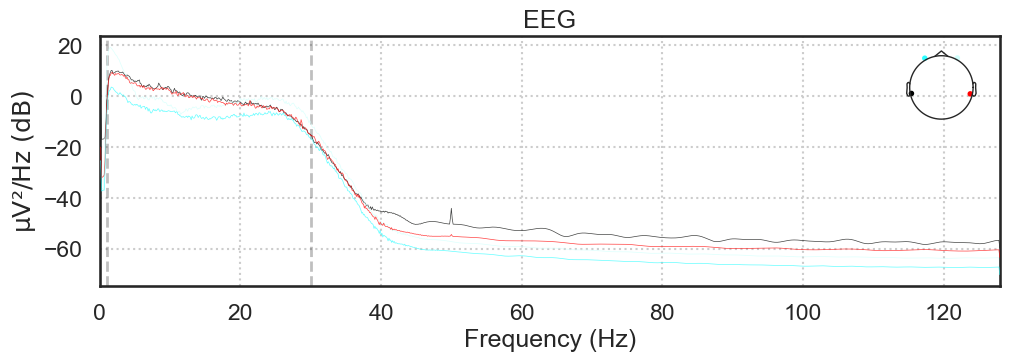

In [13]:

###################################################################################################
# Visualize the power spectrum
# ----------------------------

raw.plot_psd()


In [32]:
#raw.savefig('test_powerspectrum.png', bbox_inches='tight')

###################################################################################################
# Filteriing
# ----------------------------

raw.filter(1,30, method='iir');
raw.compute_psd(fmin=1, fmax=30).plot();
#raw.saveplot('test_0_0Hzspectrum.png', bbox_inches='tight')



Filtering raw data in 6 contiguous segments
Setting up band-pass filter from 1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


In [5]:
###################################################################################################
# Epoching
# ----------------------------

# Create an array containing the timestamps and type of each stimulus (i.e. face or house)
events = find_events(raw)
event_id = {'Non-Target': 1, 'Target': 2}
epochs = Epochs(raw, events=events, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,                                                                                  
                reject={'eeg': 100e-6}, preload=True,                                                                                  
                verbose=False, picks=[0,1,2,3])

print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)

epochs




1161 events found
Event IDs: [1 2]
sample drop %:  1.5503875968992276


In [26]:
###################################################################################################
# Epoch average
# ----------------------------

conditions = OrderedDict()
conditions['Non-target'] = [1]
conditions['Target'] = [2]

fig, ax = plot_conditions(epochs, conditions=conditions, 
                          ci=97.5, n_boot=1000, title='',
                          diff_waveform=(1, 2))

import matplotlib.pyplot as plt

# fig = plt.figure()
# ax = fig.add_axes([1,1,1,1])
# plt.plot([1,2])

fig.savefig('test_epoches.png', bbox_inches='tight')


%----------------------------%
Recordend data - Matilde's

In [2]:
import copy
from copy import deepcopy
import math
import logging
from collections import OrderedDict
from glob import glob
from typing import Union, List, Dict
from collections import Iterable
from time import sleep, time
from numpy.core.fromnumeric import std
import keyboard
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mne import create_info, concatenate_raws
from mne.io import RawArray
from mne.channels import make_standard_montage
from mne.filter import create_filter
from matplotlib import pyplot as plt
from scipy.signal import lfilter, lfilter_zi

from eegnb import _get_recording_dir
from eegnb.devices.eeg import EEG
from eegnb.devices.utils import EEG_INDICES, SAMPLE_FREQS
import os
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

# MNE functions
from mne import Epochs,find_events

# EEG-Notebooks functions
from eegnb.analysis.utils import load_data,plot_conditions
from eegnb.datasets import fetch_dataset


def load_csv_as_raw(
    fnames: List[str],
    sfreq: float,
    ch_ind,
    aux_ind=None,
    replace_ch_names=None,
    verbose=1,
    resp_on_missing='warn'
) -> RawArray:
    """Load CSV files into an MNE Raw object.

    Args:
        fnames (array_like): list of filename(s) to load. Should end with
            ".csv".
        sfreq (float): sampling frequency of the data.
        ch_ind (array_like): column indices to keep from the CSV files.

    Keyword Args:
        aux_ind (array_like or None): list of indices for columns containing
            auxiliary channels.
        replace_ch_names (array_like or None): list of channel name mappings
            for the selected columns.
        verbose (int): verbose level.

    Returns:
        (mne.io.RawArray): concatenation of the specified filenames into a
            single Raw object.
    """


    print('\n\nLoading these files: \n')
    for f in fnames: print(f + '\n')
    print('\n\n')


    ch_ind = copy.deepcopy(ch_ind)
    n_eeg = len(ch_ind)
    if aux_ind is not None:
        n_aux = len(aux_ind)
        ch_ind += aux_ind
    else:
        n_aux = 0

    raw = []

    for fn in fnames:
        # Read the file
        data = pd.read_csv(fn)

        # Channel names and types
        ch_names = [list(data.columns)[i] for i in ch_ind] + ["stim"]
        print(ch_names)
        ch_types = ["eeg"] * n_eeg + ["misc"] * n_aux + ["stim"]

        if replace_ch_names is not None:
            ch_names = [
                c if c not in replace_ch_names.keys() else replace_ch_names[c]
                for c in ch_names
            ]
        print(ch_names)

        # Transpose EEG data and convert from uV to Volts
        data = data.values[:, ch_ind + [-1]].T
        data[:-1] *= 1e-6

        # create MNE object
        info = create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq, verbose=1)
        raw.append(RawArray(data=data, info=info, verbose=verbose))
    
    raws = concatenate_raws(raw, verbose=verbose)
    montage = make_standard_montage("standard_1005")
    raws.set_montage(montage,on_missing=resp_on_missing)

    return raws

raw_0 = load_csv_as_raw(["EEG_recording_2023-01-24-12.41.17.csv"],256, [0,1,2,3,4])


c:\Users\matil\miniconda3\envs\eeg-notebooks\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  




Loading these files: 

EEG_recording_2023-01-24-12.41.17.csv




['timestamps', 'TP9', 'AF7', 'AF8', 'TP10', 'stim']
['timestamps', 'TP9', 'AF7', 'AF8', 'TP10', 'stim']
Creating RawArray with float64 data, n_channels=6, n_times=14148
    Range : 0 ... 14147 =      0.000 ...    55.262 secs
Ready.


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)


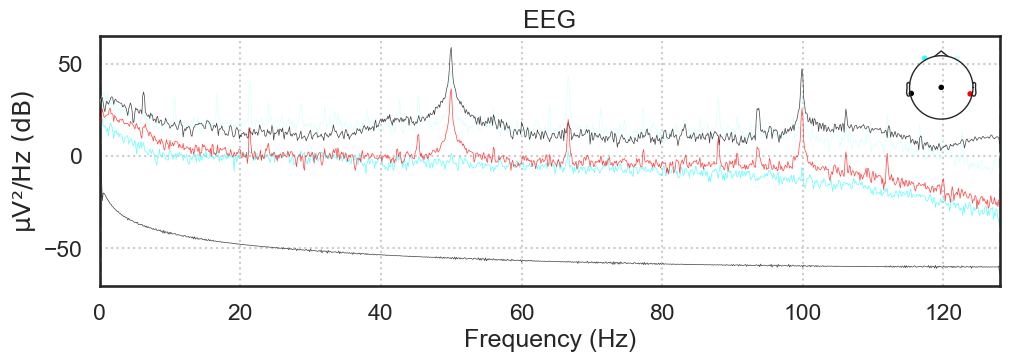

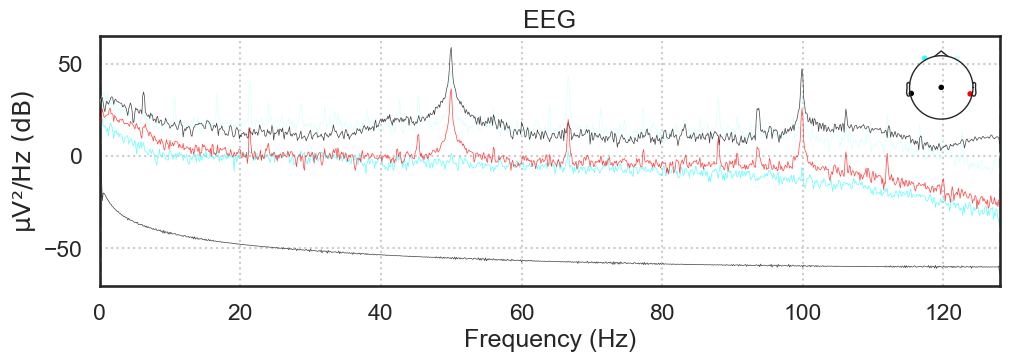

In [3]:

###################################################################################################
# Visualize the power spectrum
# ----------------------------

raw_0.plot_psd()

In [4]:
#raw.savefig('test_powerspectrum.png', bbox_inches='tight')

###################################################################################################
# Filteriing
# ----------------------------

raw_0.filter(1,30, method='iir');
raw_0.compute_psd(fmin=1, fmax=30).plot();
#raw.saveplot('test_0_0Hzspectrum.png', bbox_inches='tight')



Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


In [ ]:

raw_0.filter(1,30, method='iir');
raw_0.compute_psd(fmin=1, fmax=30).plot();
#raw.saveplot('test_0_0Hzspectrum.png', bbox_inches='tight')



In [36]:
###################################################################################################
# Epoching
# ----------------------------

# Create an array containing the timestamps and type of each stimulus (i.e. face or house)
events = find_events(raw_0)
event_id = {'Non-Target': 1, 'Target': 2}
epochs = Epochs(raw_0, events=events, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,                                                                                  
                reject={'eeg': 100e-6}, preload=True,                                                                                  
                verbose=False, picks=[0,1,2,3])

print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)

epochs


Trigger channel has a non-zero initial value of 121 (consider using initial_event=True to detect this event)
6941 events found
Event IDs: [   3    5    6    7    8    9   10   11   12   13   14   15   16   17
   18   19   20   21   22   23   24   25   26   27   28   29   30   31
   32   33   34   35   36   37   38   39   40   41   42   43   44   45
   46   47   48   49   50   51   52   53   54   55   56   57   58   59
   60   61   62   63   64   65   66   67   68   69   70   71   72   73
   74   75   76   77   78   79   80   81   82   83   84   85   86   87
   88   89   90   91   92   93   94   95   96   97   98   99  100  101
  102  103  104  105  106  107  108  109  110  111  112  113  114  115
  116  117  118  119  120  121  122  123  124  125  126  127  128  129
  130  131  132  133  134  135  136  137  138  139  140  141  142  143
  144  145  146  147  148  149  150  151  152  153  154  155  156  157
  158  159  160  161  162  163  164  165  166  167  168  169  170  171
  172  173

ValueError: No matching events found for Non-Target (event id 1)